# 常微分方程
---

方程中的未知量是方程而不是变量，并且涉及未知函数导数的方程称为[微分方程](https://zh.wikipedia.org/wiki/微分方程)（Differential Equation, **ED**）。在这类方程中，如果导数的未知函数只有一个因变量，称之为[常微分方程](https://zh.wikipedia.org/wiki/常微分方程)（Ordinary Differential Equation, **ODE**）。如果方程中存在多个变量的导数，则称为[偏微分方程](https://zh.wikipedia.org/wiki/偏微分方程)（Partial Differential Equation, **PDE**）。

常微分方程在科学和工程中有广泛引用。例如根据牛顿第二运动定律，物体在力的作用下的位移$s$和时间$t$的关系就可以表示为如下常微分方程：

$$m{\frac {d^{2}s}{dt^{2}}}=f(s)$$

除非特殊情况，常微分方程的解析闭合解不存在，我们需要使用数值方法进行求解。

## 导入模块
---

为了求解ODE，我们需要使用SymPy库以及SciPy的integrate模块。

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import sympy
sympy.init_printing()

from scipy import integrate

In [2]:
%reload_ext version_information
%version_information numpy, matplotlib, scipy, sympy, bqplot

Software versions
Python 3.9.7 64bit [GCC 9.4.0]
IPython 8.0.0
OS Linux 5.10.84 10.3.al8.x86_64 x86_64 with glibc2.32
numpy 1.21.2
matplotlib 3.5.1
scipy 1.5.3
sympy 1.9
bqplot 0.12.32
Tue May 17 22:54:46 2022 CST

## 常微分方程
---

常微分方程的最简单形式是$\frac{dy(x)}{dx}=f(x, y(x))$，其中$y(x)$是未知函数，$f(x, y(x))$是已知函数。由于方程中有$y(x)$的导数，因此这是一个微分方程。同时该方程中只出现了一阶导数，因此这是一阶ODE。更一般的情况下，可以将n阶ODE写为隐式形式$F(x, y, \frac{dy}{dx},\cdots,\frac{d^ny}{dx^n})$，其中$F$是已知函数。

二阶ODE的例子为牛顿第二运动定律$F=ma$，也可写成$F(x(t))=m\frac{d^2x(t)}{dt^2}$。为了求解该ODE，我们除了找到它的一般解，还必须给出对象的初始位置和速度。类似的，$n$阶ODE的一般解有$n$个自由参数，需要给出未知函数的初始条件以及$n-1$阶导数。

高阶ODE总可以重新写成一阶常微分方程组。具体来说，$\frac{d^ny}{dx^n}=g(x, y, \frac{dy}{dx},\cdots,\frac{d^ny}{dx^n})$形式的$n$阶ODE可以引入$n$个新函数$y_n = \frac{d^ny}{dx^n}$。这将产生下面的一阶常微分方程组。

$$\frac{d}{dx}
\begin{bmatrix}y_1 \\y_2 \\\vdots \\y_n\end{bmatrix}=
\begin{bmatrix}y_2 \\y_3 \\\vdots \\g(x, y_1, \cdots, y_n)
\end{bmatrix}$$

上式可以写为更紧凑的形式$\frac{d}{dx}\mathbf{y}(x) = f(x, \mathbf{y}(x))$。

牛顿第二定律可以写成标准形式$\mathbf{y}=[y_1=x, y_2=\frac{dx}{dt}]$，或者

$$\frac{d}{dt}
\begin{bmatrix}y_1 \\y_2 \end{bmatrix} = 
\begin{bmatrix}y_2 \\F(y_1)/m\end{bmatrix}$$

如果函数$f_1, f_2, \cdots,f_n$是线性的，那么对应的常微分方程组可以写成简单形式：

$$\frac{d}{dx}\mathbf{y}(x) =\mathbf{A}(x)\mathbf{y}(x) + \mathbf{r}(x)$$

其中$A(x)$是一个n×n的矩阵，$r(x)$是一个仅依赖于x的n维向量，被称为源项。如果$r(x) = 0$，则线性方程组是齐次的。线性常微分方程是可以求解的（例如使用$A(x)$的特征值分解）。对于一般的$f(x, y(x))$，没有通用的求解方法。

## 符号方法求解ODE
---

SymPy提供了一个通用的ODE求解器`sympy.dsolve`，它可以为很多基本的ODE找到解析解。可以符号求解的典型ODE是一阶或者二阶ODE，以及具有较少未知函数的一阶线性ODE方程组。

### 牛顿冷却定律

为了演示SymPy求解ODE的方法，我们考虑一个简单的一阶ODE，牛顿冷却定律$\frac{dT(t)}{dt} = -k(T(t)-T_a)$，其中初始温度$T(0)=T_0$。该定律描述了环境温度$T_a$中的物体温度随时间的变化。

In [3]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

将ODE写为$\frac{dT(t)}{dt} + k(T(t)-T_a) = 0$，并为ODE左边创建一个SymPy表达式

In [4]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0)  # 使用sympy.Eq显示方程

将ODE表达式传递给`sympy.dsolve`函数求解

In [5]:
ode_sol = sympy.dsolve(ode)
ode_sol

找到上述一般解之后，需要使用初始条件来找到未知函数中常数的值。这里创建一个描述初始条件的字典ics={$T(0)$:$T_0$}，然后使用SymPy的subs方法将初始条件应用到ODE的一般解，从而得到未知积分常数$C_1$.

In [6]:
ics = {T(0): T0}
ics

In [7]:
C_eq = ode_sol.subs(t, 0).subs(ics)
C_eq

In [8]:
C_sol = sympy.solve(C_eq)
C_sol

In [9]:
ode_sol.subs(C_sol[0])

### 自动应用初始条件

上述一阶问题求解未知积分常数的过程比较简单直接，但是在高阶问题中应用初始条件和求解积分常数较为繁琐。我们可以将这些步骤集中到一个函数之中，将这个过程推广到任意阶数的微分方程。

In [10]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [11]:
ode_sol

In [12]:
ode_sol = apply_ics(ode_sol, ics, t, [k, Ta])
ode_sol

我们这里画出不同冷却系数下的温度曲线。

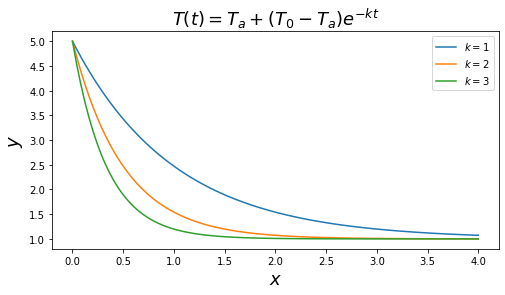

In [13]:
y_x = sympy.lambdify((t, k), ode_sol.rhs.subs({T0: 5, Ta: 1}), 'numpy')

fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(0, 4, 100)

for k in [1, 2, 3]:
    ax.plot(x, y_x(x, k), label=r"$k=%d$" % k)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

### 阻尼振荡器

作为一个稍微复杂一点的例子，我们考虑阻尼谐波振荡器的ODE，这是二阶ODE

$$\frac{d^2 x(t)}{dt^2} + 2 \gamma \omega_0 \frac{d x(t)}{dt} + \omega_0^2 x(t) = 0$$

其中$x(t)$是振荡器在时间$t$的位置，$\omega_0$是无阻尼的振荡频率，$\gamma$是阻尼比。

当阻尼为0时，上式就是简谐运动的运动方程。

In [16]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
gamma = sympy.symbols("gamma", complex=True)
x = sympy.Function("x")

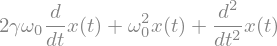

In [17]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
ode

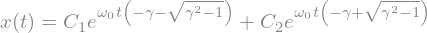

In [18]:
ode_sol = sympy.dsolve(ode)
ode_sol

由于这是一个二阶ODE，因此在一般解中存在两个位置积分常数。需要为位置和速度指定初始条件。

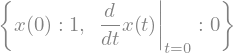

In [19]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics

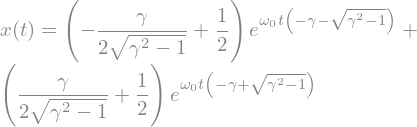

In [22]:
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

对应临界阻尼的$\gamma = 1$直接带入表达式会导致除零错误。我们需要使用极限方法计算$\gamma = 1$这个特殊值。

In [23]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

最后，我们绘制$\omega_0 = 2 \pi$和不同阻尼比的图形：

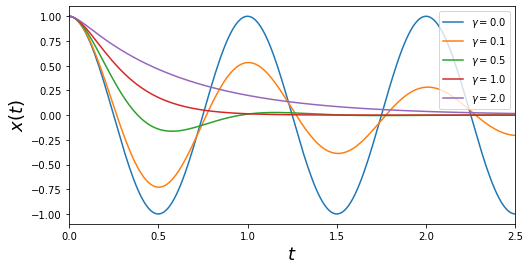

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 3, 250)
for g in [0.0, 0.1, 0.5, 1, 2.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.set_xlim(0, 2.5)
ax.legend()

对于$\gamma < 1$，振荡器是欠阻尼的，可以看到解是震荡的；对于$\gamma > 1$，振荡器是过阻尼的，可以看到解是单调衰减的。

对于很多其它形式的方程，SymPy无法找到解析解。例如二阶ODE 
$$\frac{d^2y(x)}{dx^2}=x+y(x)^2$$

In [25]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

try:
    sympy.dsolve(y(x).diff(x, x) - f)
except NotImplementedError:
    print("NotImplementedError")

NotImplementedError


### 方向场图

方向场图可以用于可视化一阶ODE的可能解。它由x-y平面网格中未知函数斜率的短线组成。

我们只需要遍历坐标网络中感兴趣区域的x和y值，然后计算$f(x, y(x))$在该点的斜率，就可以生成该ODE的方向场图。

在方向场图中，与斜率相切的平滑连续曲线就是ODE的可能解。

In [26]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    return ax

使用上面的函数，为$f(x, y(x)) = -x/y(x)$、$f(x, y(x)) = y(x)^2+x$和$f(x, y(x)) = -y(x)$生成方向场图。

<AxesSubplot:title={'center':'$\\frac{d}{d x} y{\\left(x \\right)} = - y{\\left(x \\right)}$'}>

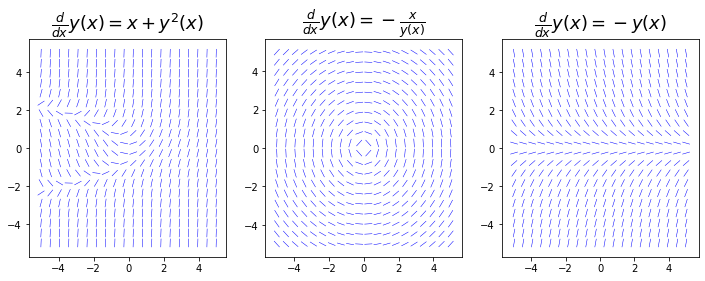

In [27]:
x = sympy.symbols("x")
y = sympy.Function("y")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), -y(x), ax=axes[2])

### 近似解析解

下面我们将借助方向场图对无法解析求解的ODE问题进行可视化分析。

考虑ODE$\frac{dy(x)}{dx}=x+y(x)^2$，初始条件y(0) = 0。

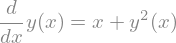

In [28]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = x + y(x)**2
sympy.Eq(y(x).diff(x), f)

这里需要找到满足初始条件的特定的[幂级数解](https://docs.sympy.org/latest/modules/solvers/ode.html)。

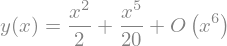

In [29]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics = ics, hint='1st_power_series')
ode_sol

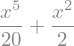

In [30]:
ode_sol.rhs.removeO()

将ODE的解和方向场绘制在一起，这是找到近似幂级数解的有效范围的一种快捷方法。

根据幂级数解的性质，x较大时误差会急剧扩大。误差在左图中，$x = 0$ 附近，近似解的曲线可以很好地与方向线对齐，但是 $|x| \geq 0$时开始偏离。我们可以通过不断拓展初始条件x的值**分段求解**ODE，可以获得扩展的有效范围内的解法。右图红色曲线就是通过使用初始条件序列求解ODE得到的连续曲线。

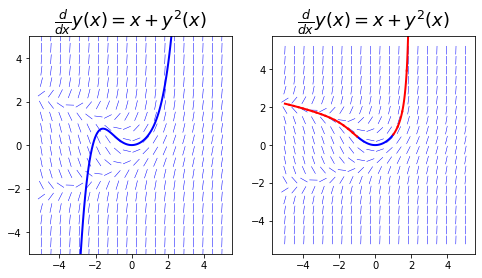

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)

'''不断更新初始条件，分段求解ODE'''
ode_sol_m = ode_sol_p = ode_sol
dx = 0.25
'''x的正值'''
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6, hint='1st_power_series')
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec), 'r', lw=2)
'''x的负值'''
for x0 in np.arange(-1, -5, -dx):
    x_vec = np.linspace(x0, x0 - dx, 100)
    ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6, hint='1st_power_series')
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)

In [28]:
ode_sol_m.rhs.removeO().subs(x, -5)

In [29]:
ode_sol_m.rhs.removeO().subs(x, -5)

### 使用拉普拉斯变换求解ODE
---

对ODE进行拉普拉斯变换，可以将很多问题转化为更容易求解的代数方程。然后可以通过拉普拉斯逆变换将代数方程的解转换回原始域，从而得到原始问题的解。

拉普拉斯变换是一个线性变换，可将一个有实数变量 $t\geq 0$的函数变换为一个变量为复数$s$的函数。函数导数的拉普拉斯变换是函数自身拉普拉斯变换的线性表达式：

$${\mathcal {L}}\left\{f'(t)\right\}=s\cdot {\mathcal {L}}\left\{f(t)\right\}-f(0)$$
$${\mathcal {L}}\left\{f^{(n)}(t)\right\}=s^{n}\cdot {\mathcal {L}}\left\{f(t)\right\}-s^{n-1}f(0)-\cdots -f^{(n-1)}(0)$$

例如，我们考虑受驱阻尼振荡器的微分方程：

$$\frac{d^2}{dt^2}y(t) + 2\frac{d}{dt}y(t) + 10y(t) = 2sin3t$$

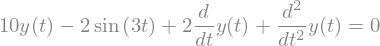

In [33]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
sympy.Eq(ode, 0)

对上述ODE进行拉普拉斯变换：

In [34]:
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
L_y

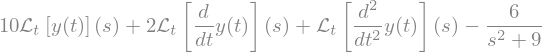

In [35]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
L_ode

SymPy不能自动对未知函数的导数进行变换，我们需要定义一个函数完成这个任务。通过遍历L_ode的表达式树，并使用函数导数拉普拉斯变换公式替换。

In [36]:
def laplace_transform_derivatives(e):
    """
    Evaluate the laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = d.args[1][1]
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))

    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])

    return e

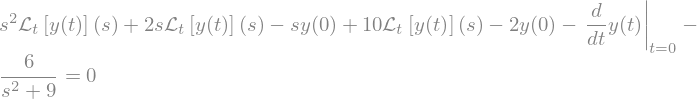

In [37]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2, 0)

使用符号$Y$替换表达式中的$\mathcal{L}_t[y(t)](s)$:

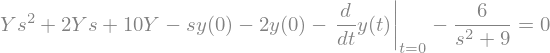

In [38]:
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3, 0)

我们使用初始条件$y(0)=1$ 和 $y'(0)=0$，并将包含边界条件的字典替换ODE方程的值：

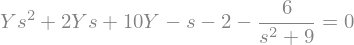

In [39]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4, 0)

求解这个代数方程：

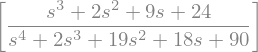

In [40]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

得到解的列表。对该表达式进行拉普拉斯逆变换：

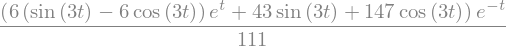

In [41]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

我们对计算结果，即受驱阻尼振荡器的轨迹方程进行可视化。

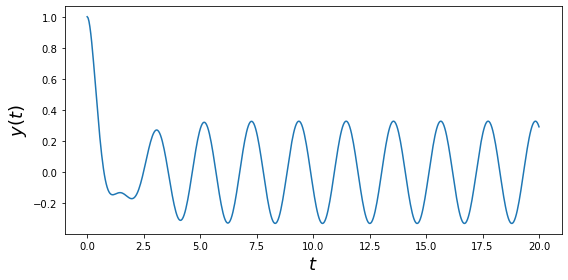

In [42]:
y_t = sympy.lambdify(t, y_sol, 'numpy')
fig, ax = plt.subplots(figsize=(8, 4))

tt = np.linspace(0, 20, 500)
ax.plot(tt, y_t(tt).real)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y(t)$", fontsize=18)
fig.tight_layout()

这种首先对ODE进行拉普拉斯变换，求解对应代数方程，然后对结果进行拉普拉斯逆变换以得到原始问题解的技术，广泛应用于电气工程和过程控制等领域。

## 数值求解ODE
---

任何ODE问题都可以标准形式写为一阶常微分方程组，我们这里将讨论标准形式$\frac{dy(x)}{dx}=f(x, y(x))$的一阶常微分方程的数值求解方法，并介绍SciPy的相关函数。

### 欧拉方法

很多ODE数值方法的基本思想都来自欧拉方法，欧拉方法可以从函数$y(x)$在点$x$处的泰勒级数展开推导而来：

$$y(x+h)=y(x)+\frac{dy}{dx}h+\frac{1}{2}\frac{d^2y}{dx^2}h^2+\cdots$$

去掉二阶和更高阶的项，我们得到近似等式$y(x+h)\approx y(x)+\frac{dy}{dx}h$，该式中的步长$h$已精确到一阶。通过将变量$x$离散化为$x_0$、$x_1$、$x_2$、$\cdots$、$x_k$，并设置步长$h_k = x_{k+1} - x_k$，可以将公式转换为迭代公式：

$$y_{k+1}\approx y_k+f(x_k, y_k)h_k$$

该公式被称为**前向欧拉法**。

该方法会带来两方面误差：泰勒级数截断产生的误差，以及计算$y_{k+1}$时，$y_{k}$近似值造成的累计误差。

类似的方法可以得到**后向欧拉法**，它的迭代公式为：

$$y_{k+1}\approx y_k+f(x_{k+1}, y_{k+1})h_k$$

这是一种[后向微分公式](https://en.wikipedia.org/wiki/Backward_differentiation_formula)（BDF），并且是隐式的。因为为了计算$y_{k+1}$需要求解一个代数方程。在每一个迭代过程中，隐式法相比显式法要做更多的计算，但是隐式法通常拥有更大的稳定区域以及更高的准确性。这意味着隐式法可以使用更大的步长。对于描述具有多个不同时间尺度的动力学ODE问题，例如包含快速振荡和慢速振荡的动力学，隐式法是更好的选择。

### 高阶方法

改进一阶欧拉方法的一个途径是在泰勒级数展开中保留高阶项。例如二阶方法：

$$y(x+h)\approx y(x)+\frac{dy}{dx}h+\frac{1}{2}\frac{d^2y}{dx^2}h^2$$

计算函数$y(x)$高阶导数，可以使用导数的有限差分，或者通过在区间$[x_k, x_{k+1}]$的中点对$f(x, y(x))$进行采样来近似高阶导数。

这种方法的典型例子就是[龙格-库塔法](https://zh.m.wikipedia.org/zh-hans/龙格－库塔法)。最常用的**龙格-库塔法**是四阶形式RK4，它的迭代公式为：

$$y_{{k+1}}=y_{k}+{h_k \over 6}(k_{1}+2k_{2}+2k_{3}+k_{4})$$

其中
$$k_{1}=f\left(t_{k},y_{k}\right)$$
$$k_{2}=f\left(t_{k}+{h \over 2},y_{k}+{h \over 2}k_{1}\right)$$
$$k_{3}=f\left(t_{k}+{h \over 2},y_{k}+{h \over 2}k_{2}\right)$$
$$k_{4}=f\left(t_{k}+h,y_{k}+hk_{3}\right)$$

这里的$k_1 \sim k_4$的计算需要使用前面计算$y_{k+1}$的显式公式。

通过组合不同阶的方法，可以估计近似值的误差。一种常见的组合是龙格-库塔法的四阶和五阶组合，这种方法被称为RK45。

### 多步方法

另外一个改进精度的途径是使用$y_k$的多个前值来计算$y_{k+1}$，这被称为[线性多步法](https://en.wikipedia.org/wiki/Linear_multistep_method)。它的迭代公式为：

$$y_{k+s} = \sum _{n=0}^{s-1}a_{n}y_{k+n} + h\sum _{n=0}^{s}b_{n}f(x_{k+n},y_{k+n}) $$

使用以上公式，可以利用前$s$个$y_k$和$f(x_{k},y_{k})$来计算$y_{k+s}$（$s$步法）。如果$b_{n}=0$则是显式法；如果$b_{n} \neq 0$则是隐式法。

例如, $a_0 = b_1 = 1$的一步BDF法可退化为后向欧拉法；两步BDF法在求解出系数$a_0$、$a_1$和$b_2$后，迭代公式为$y_{k+2} = -\frac{1}{3} y_k + \frac{4}{3} y_{k+1} + \frac{2}{3} hf(x_{k+2},y_{k+2})$。

为了更高的精度，我们还可以构建更高阶的BDF方法。

对于[刚性方程](https://en.wikipedia.org/wiki/Stiff_equation)，求解方程的某些数值方法在数值上是不稳定的，除非步长非常小。推荐使用SciPy中提供了BDF求解器处理刚性问题。

另外一类常用的多步法是[Adams法](https://mathworld.wolfram.com/AdamsMethod.html)（Adaptive Moment Estimation），它的系数$a_{s-1} = 1$且$a_0=a_1=\cdots=a_{s-2}=0$，其它未知系数用于最大化方法的阶数。$b_{s}=0$的显式法被称为Adams–Bashforth法，$b_{s} \neq 0$的隐式法被称为Adams–Moulton法。

例如，Adams–Bashforth法和Adams–Moulton法的两步法分别是：
$$y_{k+2} = y_{k+1} + h(-\frac{1}{2}f(x_{k},y_{k}) + \frac{3}{2}f(x_{k+1},y_{k+1}))$$
和
$$y_{k+1} = y_{k} + \frac{1}{2}h(f(x_{k},y_{k}) + f(x_{k+1},y_{k+1}))$$

如果误差值可以估计，求解器就可以在可能的时候使用较大的步长或者使用较低的阶数来提升计算效率。在Adams法中，阶数可以很容易改变。

SciPy同样提供了Adams法的求解器，可以用于非刚性方程。

### 预测-矫正法

一般来说，显式法比隐式法更容易实现，计算量较小。但是隐式法通常更精确且稳定性更好。

一种兼顾两种方法优点的折中办法时将显式法和隐式法组合使用：首先使用显式法计算$y_{k+1}$，然后使用$y_{k+1}$作为隐式法中求解方程的初始猜测值。这个方程不需要精确求解，只需要进行少量的迭代即可。

这种使用显式法预测$y_{k+1}$，使用隐式法矫正预测值的方法称为[预估-矫正法](https://zh.m.wikipedia.org/zh-hans/预估-校正方法)。

## SciPy对ODE进行数值积分
---

SciPy的integrate模块提供了两种ODE求解器接口：[integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)和[integrate.ode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html)。

`integrate.odeint`时[ODEPACK](https://computing.llnl.gov/projects/odepack)（基于Fortran）的LSODA求解器接口，可以在非刚性问题的Adams预测-矫正方法与刚性问题的BDF求解器之间自动切换。`integrate.ide`则为很多不同的求解器提供了面向对象接口：VODE和ZVODE求解器([netlib](https://www.netlib.org/)提供，基于Fortran)、LSODA求解器、dopri5和dop853求解器（自适应步长的四阶和八阶Dormand-Prince法）。

`odeint`函数有3个强制参数：用于计算ODE标准形式中右侧值的函数，为未知函数设定的初始条件数组，以及因变量值的数组。

### 标量问题

为了展示`odeint`函数的使用，我们将重新计算标量ODE $y'(x) = f(x, y(x)) = y(x)^2+x$。

In [43]:
x = sympy.symbols("x")
y = sympy.Function("y")

f = y(x)**2 + x  # 构造SymPy表达式，用于绘制ODE方向场

f_np = sympy.lambdify((y(x), x), f, 'math')  # 转换为Python函数

需要注意，`odeint`中使用的`f(x, y(x))`函数必须具有$f(y, x)$的函数签名，即`y`应置于`x`之前。

接下来，需要定义初始值$y_0$以及因变量$x$离散化后的NumPy数组。

In [44]:
y0 = 0
xp = np.linspace(0, 1.9, 100)  # 正值数组
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)   # 负值数组
ym = integrate.odeint(f_np, y0, xm)

`odeint`函数返回的结果是包含离散点处的y值的一维数组。

下面，我们将数值积分结果与方向场绘制在一起，可以看到数值解与方向场中的线对齐相切。

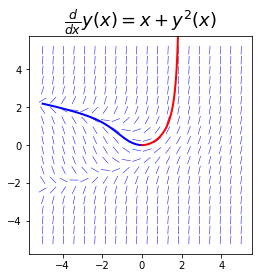

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

### ODE方程组

#### **二阶ODE问题**

我们首先回顾受驱阻尼振荡器的二阶ODE问题：

$$\frac{d^2}{dt^2}y(t) + 2\frac{d}{dt}y(t) + 10y(t) = 2sin3t$$

我们需要引入$y_1(t) = y(t)$和$y_2(t) = y'(t)$将方程写成标准形式：

$$\frac{d}{dt}
\begin{bmatrix}y_1 \\y_2 \end{bmatrix}=
\begin{bmatrix}y_2 \\  2sin3t - 2y_2(t)  - 10y_1(t) \end{bmatrix}$$

定义一个Python函数：

In [48]:
def f(y, t):
    return y[1],  2*np.sin(t*3) - 2*y[1] - 10*y[0]

为初始条件$y(0)=1$ 和 $y'(0)=0$创建数组：

In [49]:
y0 = [1, 0]
t = np.linspace(0, 20, 200)
y_t = integrate.odeint(f, y0, t)
y_t.shape

返回一个形状为shape(200, 2)的数组，包含$t$中200个值对应的$y(t)$和$y'(t)$。

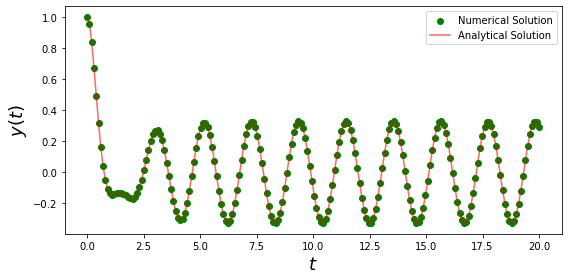

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(t, y_t[:,0], color = ['g'], label = "Numerical Solution")  # 数值解

t_sym = sympy.symbols("t", positive=True)
y_sym = sympy.lambdify(t_sym, y_sol, 'numpy')
ax.plot(t, y_sym(t), 'r', alpha = 0.6, label = "Analytical Solution")  # 解析解

ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$y(t)$", fontsize=18)
ax.legend()

fig.tight_layout()

可以看到，数值计算结果和解析精确解基本一致。

#### **耦合ODE问题**

在前面的示例中，ODE右侧的函数在实现时没有使用附加参数。如果需要使用可调参数，通常在实现$f$时，将所有系数或参数作为`odeint`函数的参数会更加方便。

我们考虑一个著名的ODE问题，[洛伦兹方程](https://zh.m.wikipedia.org/zh-hans/洛伦茨吸引子)，它由3个耦合的非线性ODE组成：

$$ x'(t) = \sigma(y - x) $$
$$ y'(t) = x(\rho - z) - y $$
$$ z'(t) = x y - \beta z $$

这些方程因为它们的混沌解而著名，这些解敏感地依赖于参数$\sigma$、$\rho$和$\beta$的值。

如果希望使用这些参数的不同值来求解这些方程，可以编写一个含有参数变量的函数。

In [51]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

设置$x(t)$、$x(t)$和$z(t)$的初始条件：

In [52]:
rho, sigma, beta= 28, 8, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

调用`integrate.odeint`函数时，设置args参数。我们将尝试三组不同的参数。

In [53]:
xyz1 = integrate.odeint(f, xyz0, t, args=(rho, sigma, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(rho, sigma, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(rho, 2*sigma, 0.6*beta))

下面将绘制三个解的3D图形，可以看到，当参数发生很小的变化时，得到的解可能会有很大区别。

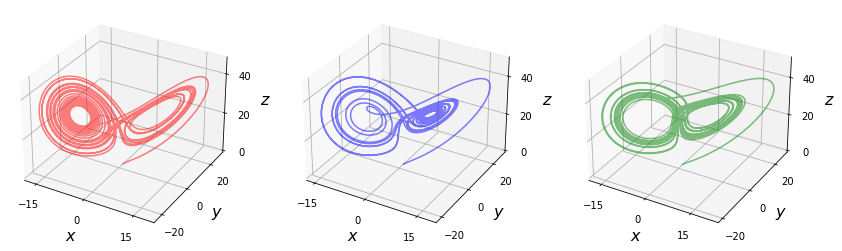

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

fig.tight_layout()

上述的3个示例都使用了`integrate.odeint`函数。该函数有大量的可选参数，可以对求解器进行微调，包含最大步数（hmax），Adams方法的最大阶数（mxordn），以及BDF的最大阶数（mxords）等。

### `integrate.ode`类

在SciPy中，可以将`odeint`函数替换为由`integrate.ode`提供的面向对象接口。`integrate.ode`类可以和很多不同的求解器一起工作，并为每个求解器提供可选参数，因此其使用更加灵活，功能也更加强大。

在使用`integrate.ode`类时，我们需要为ODE定义右侧函数以及初始状态的数组，还有因变量值的数组。需要注意的一点，`integrate.ode`使用的右侧函数的函数签名是$f(x, y)$，与`odeint`函数的规定顺序相反。

这里我们考虑天体运行中的[三体问题](https://zh.m.wikipedia.org/zh-hans/三体问题)。每一个天体在其他两个天体的万有引力作用下的运动方程都可以表示成3个二阶的ODE。因此，一般三体问题的运动方程为18个一阶ODE方程组。

In [55]:
'''integrate.ode must have the function signature f(x, y)'''
def f(t, y, args):
    G, m_A, m_B, m_C = args
    pos_A, pos_B, pos_C, vel_A, vel_B, vel_C = y[:3], y[3:6], y[6:9], y[9:12], y[12:15], y[15:]
    r_AB = np.sqrt(np.sum((pos_A-pos_B)**2))
    r_BC = np.sqrt(np.sum((pos_B-pos_C)**2))
    r_CA = np.sqrt(np.sum((pos_C-pos_A)**2))
    F_A = m_A * m_B * G*(pos_B-pos_A)/r_AB**3 + m_C * m_A * G*(pos_C-pos_A)/r_CA**3
    F_B = m_A * m_B * G*(pos_A-pos_B)/r_AB**3 + m_C * m_B * G*(pos_C-pos_B)/r_BC**3
    F_C = m_A * m_C * G*(pos_A-pos_C)/r_CA**3 + m_C * m_B * G*(pos_B-pos_C)/r_BC**3
    return np.hstack((vel_A, vel_B, vel_C, F_A/m_A, F_B/m_B, F_C/m_C))

这里函数返回的是一个一维数组，元素是ODE函数的导数。需要的参数被打包在元组args中。注意，初始条件只能使用列表或者一维数组。

In [56]:
G = 1.
m_A = 1000.
m_B = 10.
m_C = 1.

args = (G, m_A, m_B, m_C)

pos_A = np.array([0., 0., 0.])
vel_A = np.array([2., 0., 0.])
pos_B = np.array([0., 2., 0.])
vel_B = np.array([24., 0., 0.])
pos_C = np.array([0., 1.8, 0.])
vel_C = np.array([31., 0., 0.])

'''Initial condition y0 must be one-dimensional'''
y0 = np.hstack((pos_A, pos_B, pos_C, vel_A, vel_B, vel_C))

t = np.linspace(0, 2, 5000)

我们需要创建一个`integrate.ode`类的实例，将ODE函数$f$作为参数传给它。

求解器实例保存在变量`r`中。在使用它之前，需要使用方法`set_initial_value`设置初始条件。

还可以使用方法`set_integrator`来选择求解器，[可用的求解器](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html)名称为：vode、zvode、lsoda、dopri5和dop853。

In [57]:
r = integrate.ode(f)
r.set_integrator('vode', method = 'adams')
r.set_initial_value(y0, t[0])
r.set_f_params(args)

配置完求解器之后，可以调用`integrate`方法来一步一步求解ODE。不同于使用`integrate.odeint`函数，我们可以追踪已经积分到哪个点。这种方法提供了更好的灵活性。

In [58]:
dt = t[1] - t[0]
y_t = np.zeros((len(t), len(y0)))

idx = 0
while r.successful() and r.t < t[-1]:
    y_t[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

使用BqPlot对运动轨迹进行动态可视化。

In [59]:
import numpy as np
import bqplot as bq
from bqplot import pyplot as plt

figure = plt.figure(title='Bqplot Plot')
figure.layout.width = '700px'

plot_A = plt.plot(y_t[:, 0],y_t[:, 1], 'r')  # A
plot_B = plt.plot(y_t[:, 3],y_t[:, 4], 'b')  # B
plot_C = plt.plot(y_t[:, 6],y_t[:, 7], 'g')  # C
scatter_A = plt.scatter(y_t[:2, 0],y_t[:2, 1], colors=["red"])
scatter_B = plt.scatter(y_t[:2, 3],y_t[:2, 4], colors=["blue"])
scatter_C = plt.scatter(y_t[:2, 6],y_t[:2, 7], colors=["green"])

plt.show()

In [61]:
import time

idx = 0
speed = 4
for idx in range(1, len(t)-1, speed):  # Update Chart
    scatter_A.x = y_t[idx:idx+2, 0]
    scatter_A.y = y_t[idx:idx+2, 1]
    scatter_B.x = y_t[idx:idx+2, 3]
    scatter_B.y = y_t[idx:idx+2, 4]
    scatter_C.x = y_t[idx:idx+2, 6]
    scatter_C.y = y_t[idx:idx+2, 7]
    time.sleep(0.01)